##  What is Boosting?
Boosting is an ensemble learning technique — it combines many weak learners (typically simple models like decision trees) to build a strong learner.

**Goal:** Improve prediction accuracy.

**Key idea:** Each new model tries to fix the mistakes made by the previous ones.

## How does it work?
These are the following steps that should be follow:
1. **Start simple:**
Train a weak model on the data (e.g., a small decision tree).

2. **Find errors:**
Check which data points the model predicted incorrectly.

3. **Add focus:**
Give more weight to those misclassified points so the next model focuses on them.

4. **Repeat:**
Train another weak model on the updated, re-weighted data.

5. **Combine:**
Combine all the weak models into one final strong model. The final prediction is usually a weighted vote or average of all the weak learners.



## Popular Boosting Algorithms

**1.AdaBoost (Adaptive Boosting):**
        Adjusts weights of misclassified points at each round.

**2.Gradient Boosting:**
        Fits each new model to the residual errors (the differences between actual and predicted values) of the previous model.

**3.XGBoost:**
          An efficient, scalable implementation of gradient boosting — very popular in machine learning competitions.

**4.LightGBM, CatBoost:**
Other modern variants of gradient boosting — fast and good for large datasets.

# AdaBoost Algorithm

AdaBoost is one of the first and most popular boosting algorithms.

Invented by Yoav Freund and Robert Schapire.

It combines many weak learners (often shallow decision trees, called decision stumps) into a single strong classifier.

## Key Concepts:

**Weak learner:**
 Model that have accuracy near to 50% or close not high.

**Decision Stumps:**
 Decision tree that have max depth 1.

 **negative 1**  & **positive 1** 
Does not have label 0 or 1 instead it have 1 and negative 1.


## Intuition
Each new weak learner adapts to focus on the hardest points.

Weak learners can be just slightly better than random (error < 0.5) — AdaBoost still works!

It’s powerful for binary classification.

## Steps for Adaboost algorithm:

**1.Initialize weights**
Every training example starts with equal weight.
For N samples: each gets weight w = 1/N

**2.Train weak learner**
Train a weak learner (like a decision stump) using the weighted dataset.

The learner tries to minimize the weighted classification error.

**3.Compute learner’s error**
Calculate the total error:
            **sum of weights all rows that are miss classified.**

**4.Compute learner’s weight**

              α= 1/2ln( 1−error/error)
Lower error → higher α → more say in final prediction.

**5.Update sample weights**
Increase weights for misclassified points (harder ones).

Decrease weights for correctly classified points.

    new wtw ←wi×exp(α)

If correctly classified: exponent is negative → weight shrinks.

If misclassified: exponent is positive → weight grows.

Then, normalize so weights sum to 1.

**6. Repeat**
Train the next weak learner on the updated weights.

Repeat steps 2–5 for M rounds.

**Final prediction**
For classification: combine learners by weighted majority vote:

H(x)=sign( m=1∑M (αmhm(x)))


## Weaknesses

Sensitive to noisy data & outliers

Not great for very complex base learners (like big trees — lose the point of “weak”)



In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Create data
X, y = make_classification(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
# Weak learner: decision stump
stump = DecisionTreeClassifier(max_depth=1)

In [4]:
# AdaBoost
ada = AdaBoostClassifier(base_estimator=stump, n_estimators=50, learning_rate=1.0)

In [5]:
# Train
ada.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

In [6]:
# Predict
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8733333333333333


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
n_samples = 5
n_rounds = 5

In [9]:
# Start with equal weights
weights = np.zeros((n_rounds + 1, n_samples))
weights[0] = np.ones(n_samples) / n_samples

In [10]:
misclassified = [1, 3]  # index 2 and 4 in zero-based indexing

for round in range(1, n_rounds + 1):
    new_weights = weights[round - 1].copy()
    for i in range(n_samples):
        if i in misclassified:
            new_weights[i] *= 1.5  # increase weight for misclassified
        else:
            new_weights[i] *= 0.75  # decrease weight for correct
    new_weights /= new_weights.sum()  # normalize
    weights[round] = new_weights



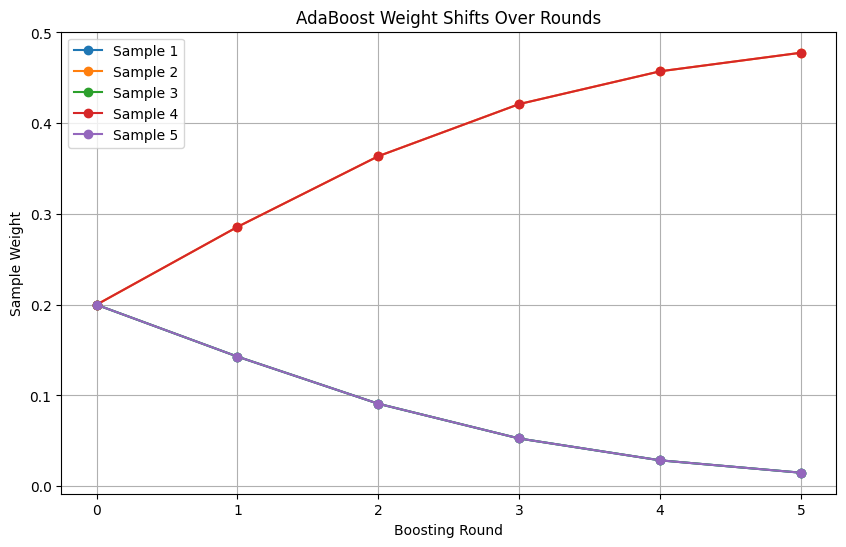

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(n_samples):
    ax.plot(range(n_rounds + 1), weights[:, i], marker='o', label=f'Sample {i+1}')

ax.set_xlabel('Boosting Round')
ax.set_ylabel('Sample Weight')
ax.set_title('AdaBoost Weight Shifts Over Rounds')
ax.legend()
plt.grid(True)
plt.show()

## Impace of learning rate

The **learning_rate** in AdaBoost controls how much each weak learner contributes to the final model.

if **learning_rate = 1.0** (the default):

Use the full computed weight.

If **learning_rate = 0.5:**

Each learner’s weight is halved.

So, each round’s correction is more conservative.



**learning_rate** and **n_estimators** work together.

Small learning_rate → more estimators needed.

Large learning_rate → fewer estimators needed.

**Why adjust it?**

High learning_rate (≈1.0) → each weak learner has full say → fewer learners needed → can overfit faster.

Low learning_rate (<1.0) → each learner tweaks the model more gently → may need more learners → usually better generalization.

In [12]:
# AdaBoost with different learning rates
ada1 = AdaBoostClassifier(stump, n_estimators=50, learning_rate=1.0)
ada2 = AdaBoostClassifier(stump, n_estimators=50, learning_rate=0.5)

## Adaboost From Scratch

In [13]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [14]:

df = pd.DataFrame()
     

In [15]:

df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [16]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

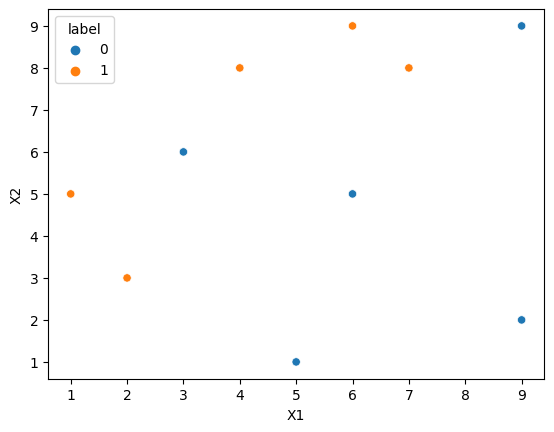

In [17]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [18]:
df.shape[0]

10

In [19]:
df['weights'] = 1/df.shape[0]

In [20]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [21]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [22]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [23]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

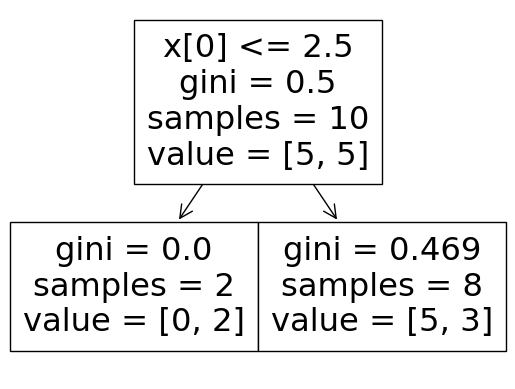

In [24]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

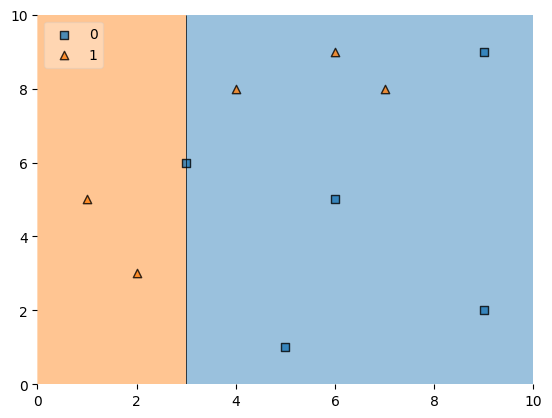

In [25]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [26]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [27]:

def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [28]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [29]:

# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [30]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [31]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [32]:
df['updated_weights'].sum()

0.9165153319682015

In [33]:

df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [34]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [35]:
df['nomalized_weights'].sum()

1.0